In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

In [125]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [126]:
df.rename(columns={'Unnamed: 0':'State'}, inplace=True)
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [127]:
df.set_index('State', inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [129]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [130]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

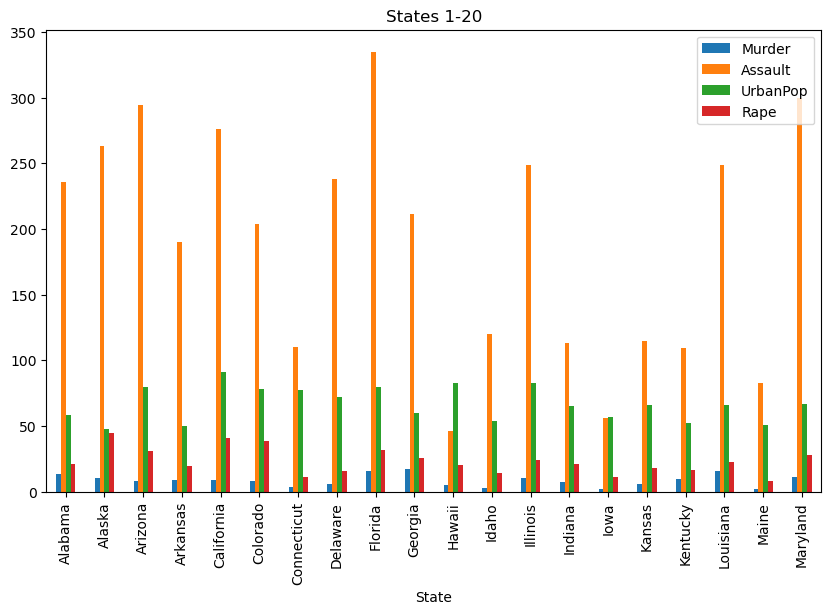

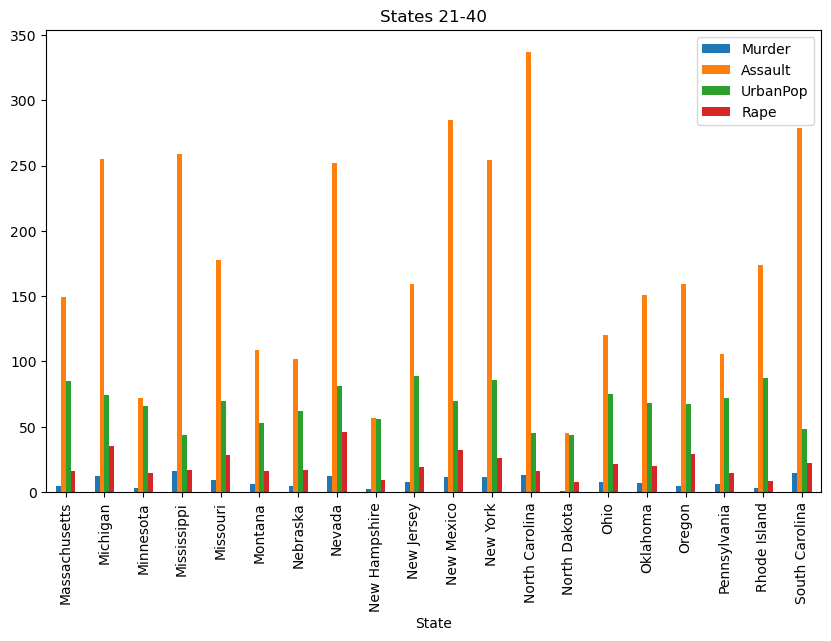

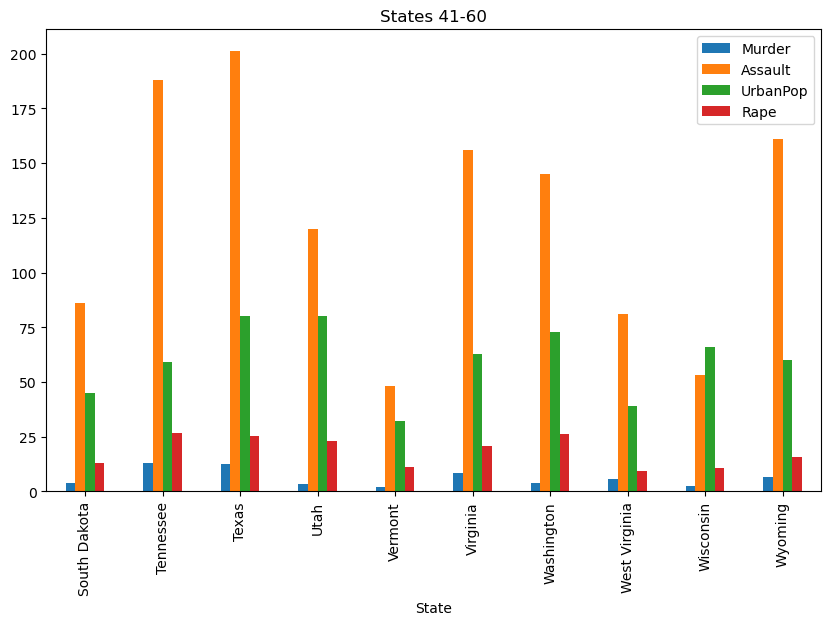

In [131]:
n_states_per_graph = 20
n_graphs = -(-len(df) // n_states_per_graph)  # Ceiling division to ensure all states are covered
for i in range(n_graphs):
    start_idx = i * n_states_per_graph
    end_idx = (i + 1) * n_states_per_graph
    states_chunk = df.index[start_idx:end_idx]
    df_chunk = df.loc[states_chunk]
    ax = df_chunk.plot(kind='bar', figsize=(10, 6))
    ax.set_title(f'States {start_idx+1}-{end_idx}')
    plt.show()

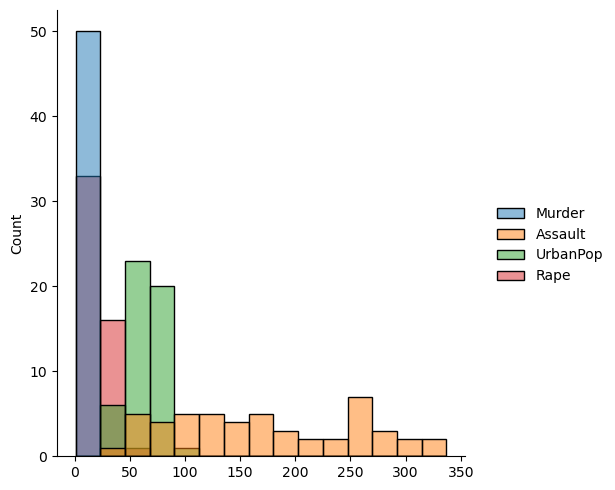

In [132]:
sns.displot(data=df)

<Axes: ylabel='Density'>

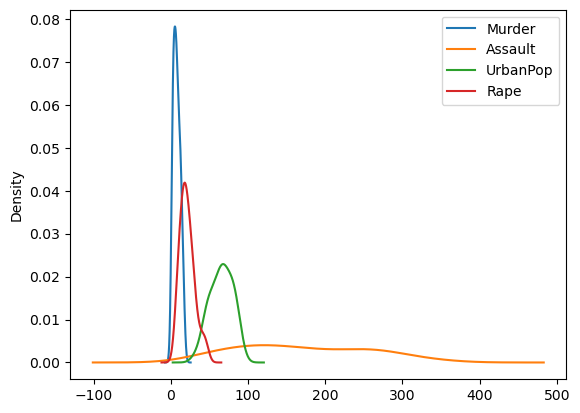

In [133]:
df.plot(kind='density')

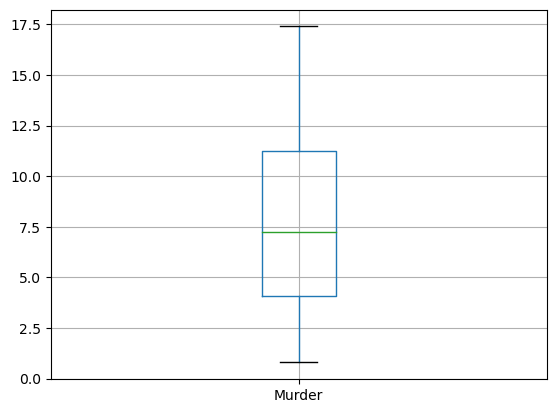

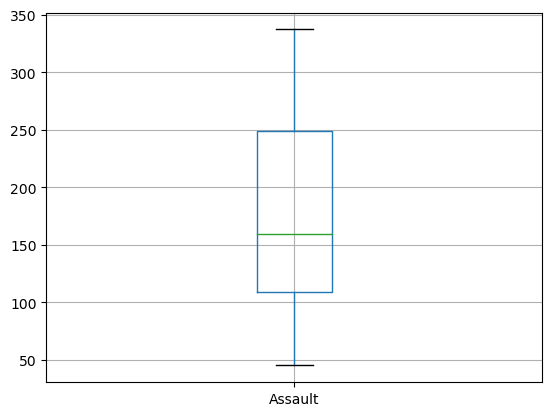

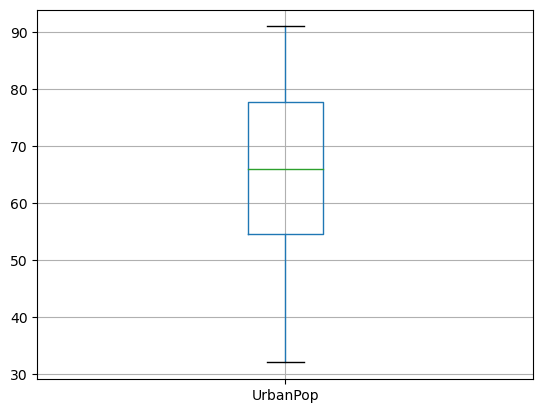

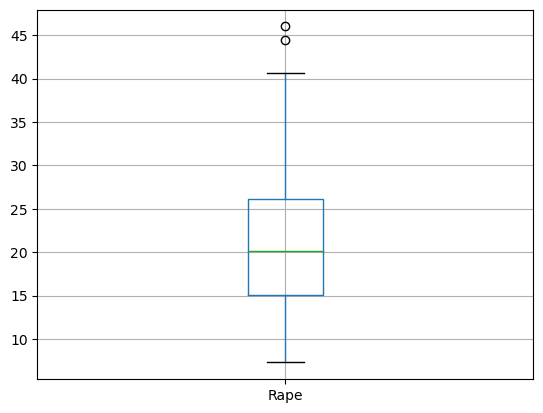

In [134]:
for feature in df.columns:
    if(feature!='State'):
        df.boxplot([feature])
        plt.show()

In [135]:
print("before outlier : ", df.shape)
df = df[df['Rape']<=43]
df.shape

before outlier :  (50, 4)


(48, 4)

<Axes: >

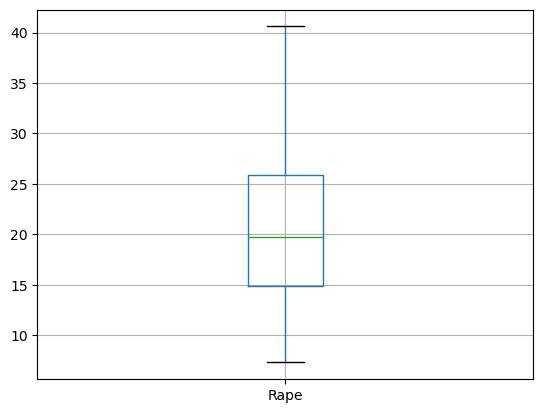

In [136]:
df.boxplot(['Rape'])

<Axes: >

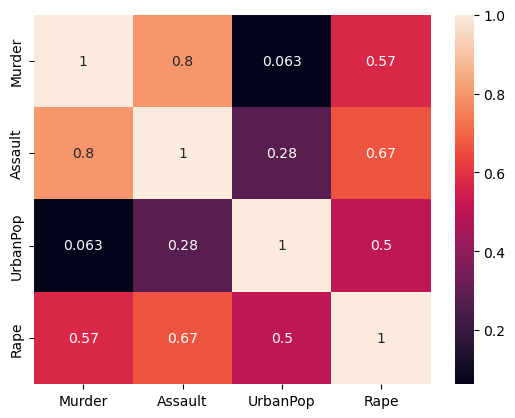

In [137]:
sns.heatmap(df.corr(), annot=True)

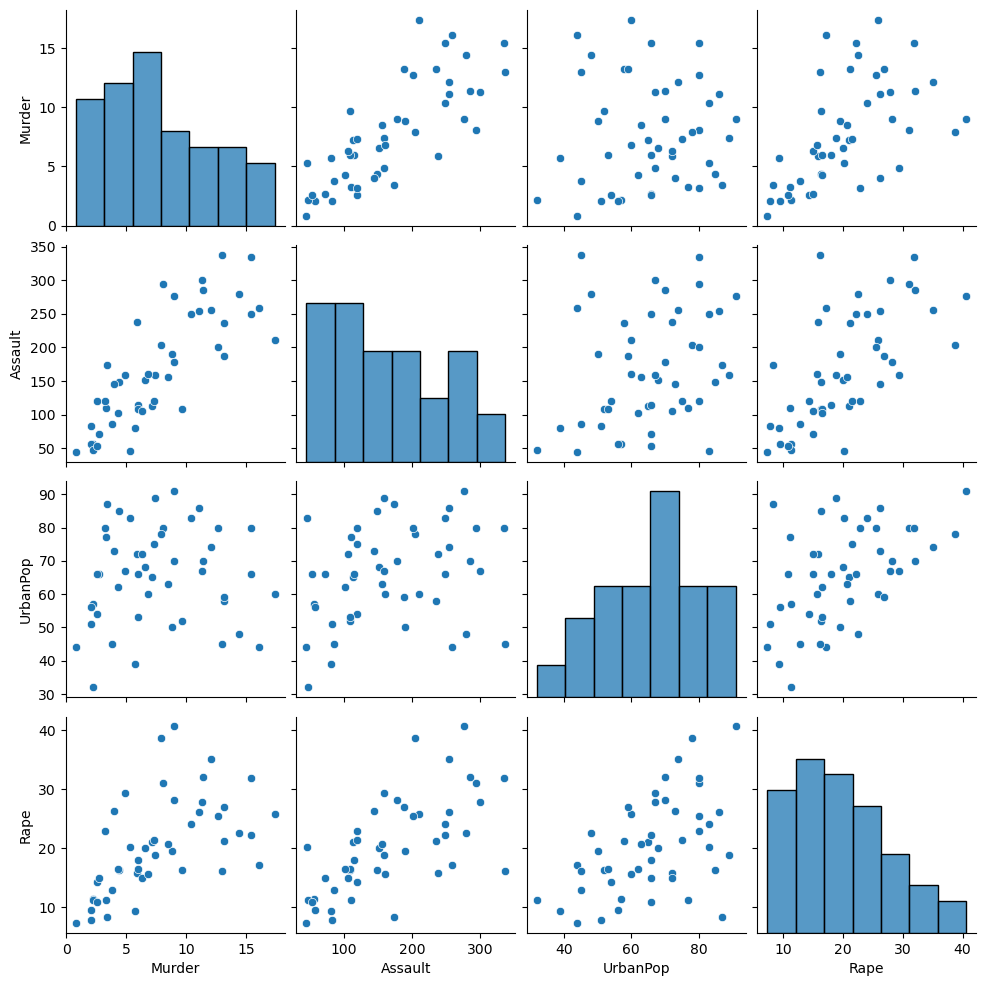

In [138]:
sns.pairplot(df)

In [139]:
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [140]:
# df.reset_index(inplace=True)
df_numeric = df.copy()

In [141]:
df_numeric.reset_index(inplace=True)
df_numeric.drop(columns=['State'], axis=1, inplace=True)
df_numeric

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,8.1,294,80,31.0
2,8.8,190,50,19.5
3,9.0,276,91,40.6
4,7.9,204,78,38.7
5,3.3,110,77,11.1
6,5.9,238,72,15.8
7,15.4,335,80,31.9
8,17.4,211,60,25.8
9,5.3,46,83,20.2


In [142]:
scaler = StandardScaler()
scaler.fit(df_numeric)
df_normal = scaler.transform(df_numeric)
df_normal

array([[ 1.27868078,  0.83731972, -0.53291148,  0.12062732],
       [ 0.10367682,  1.54264441,  1.01311744,  1.34090882],
       [ 0.26495187,  0.27792428, -1.09510382, -0.09105417],
       [ 0.31103046,  1.32375054,  1.7861319 ,  2.53628661],
       [ 0.05759823,  0.44817506,  0.87256935,  2.29970142],
       [-1.00220926, -0.69493736,  0.80229531, -1.13700974],
       [-0.40318763,  0.86164126,  0.4509251 , -0.55177269],
       [ 1.78554524,  2.041236  ,  1.01311744,  1.45297549],
       [ 2.24633111,  0.53330046, -0.3923634 ,  0.69341251],
       [-0.5414234 , -1.47322668,  1.22393956, -0.0038912 ],
       [-1.16348432, -0.57332966, -0.81400765, -0.75100233],
       [ 0.63358057,  0.99540974,  1.22393956,  0.46927917],
       [-0.10367682, -0.65845505, -0.04099319,  0.09572361],
       [-1.25564149, -1.35161897, -0.60318553, -1.11210604],
       [-0.38014834, -0.63413351,  0.02928085, -0.27783195],
       [ 0.47230552, -0.70709814, -0.95455574, -0.48951343],
       [ 1.78554524,  0.

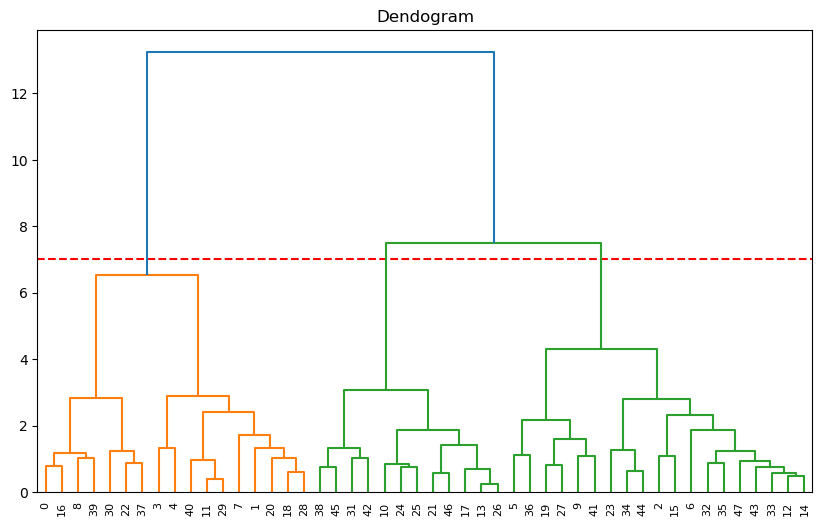

In [144]:
plt.figure(figsize=(10,6))
plt.title("Dendogram")
plt.axhline(y=7, color='r',linestyle='--')
dend = shc.dendrogram(shc.linkage(df_normal, method='ward'))

In [145]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                  linkage='ward')
y_pred = cluster.fit_predict(df_normal)

c:\Users\amalp\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [146]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2,
       0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1,
       1, 2, 2, 1], dtype=int64)

In [147]:
df['Cluster'] = y_pred

C:\Users\amalp\AppData\Local\Temp\ipykernel_21600\513453082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = y_pred


In [148]:
df

,Murder,Assault,UrbanPop,Rape,Cluster
State,,,,,
Alabama,13.2,236,58,21.2,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,0


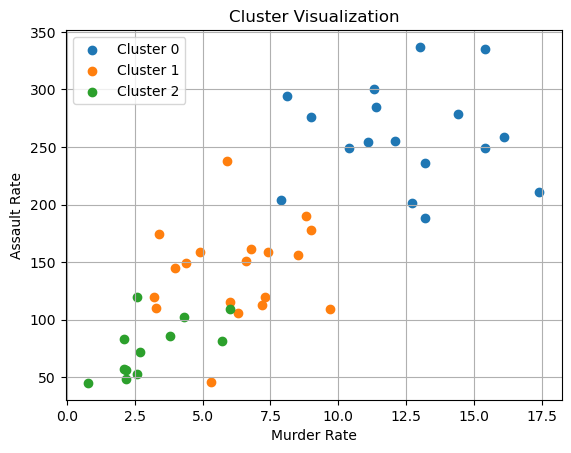

In [149]:
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Murder'], cluster_data['Assault'], label=f'Cluster {cluster}')

plt.title('Cluster Visualization')
plt.xlabel('Murder Rate')
plt.ylabel('Assault Rate')
plt.legend()
plt.grid(True)
plt.show()

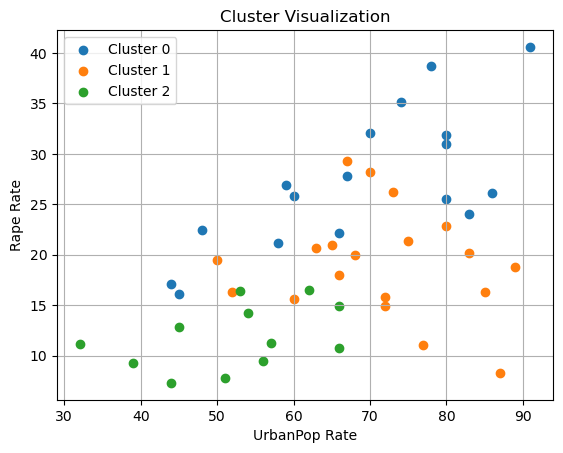

In [150]:
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['UrbanPop'], cluster_data['Rape'], label=f'Cluster {cluster}')

plt.title('Cluster Visualization')
plt.xlabel('UrbanPop Rate')
plt.ylabel('Rape Rate')
plt.legend()
plt.grid(True)
plt.show()

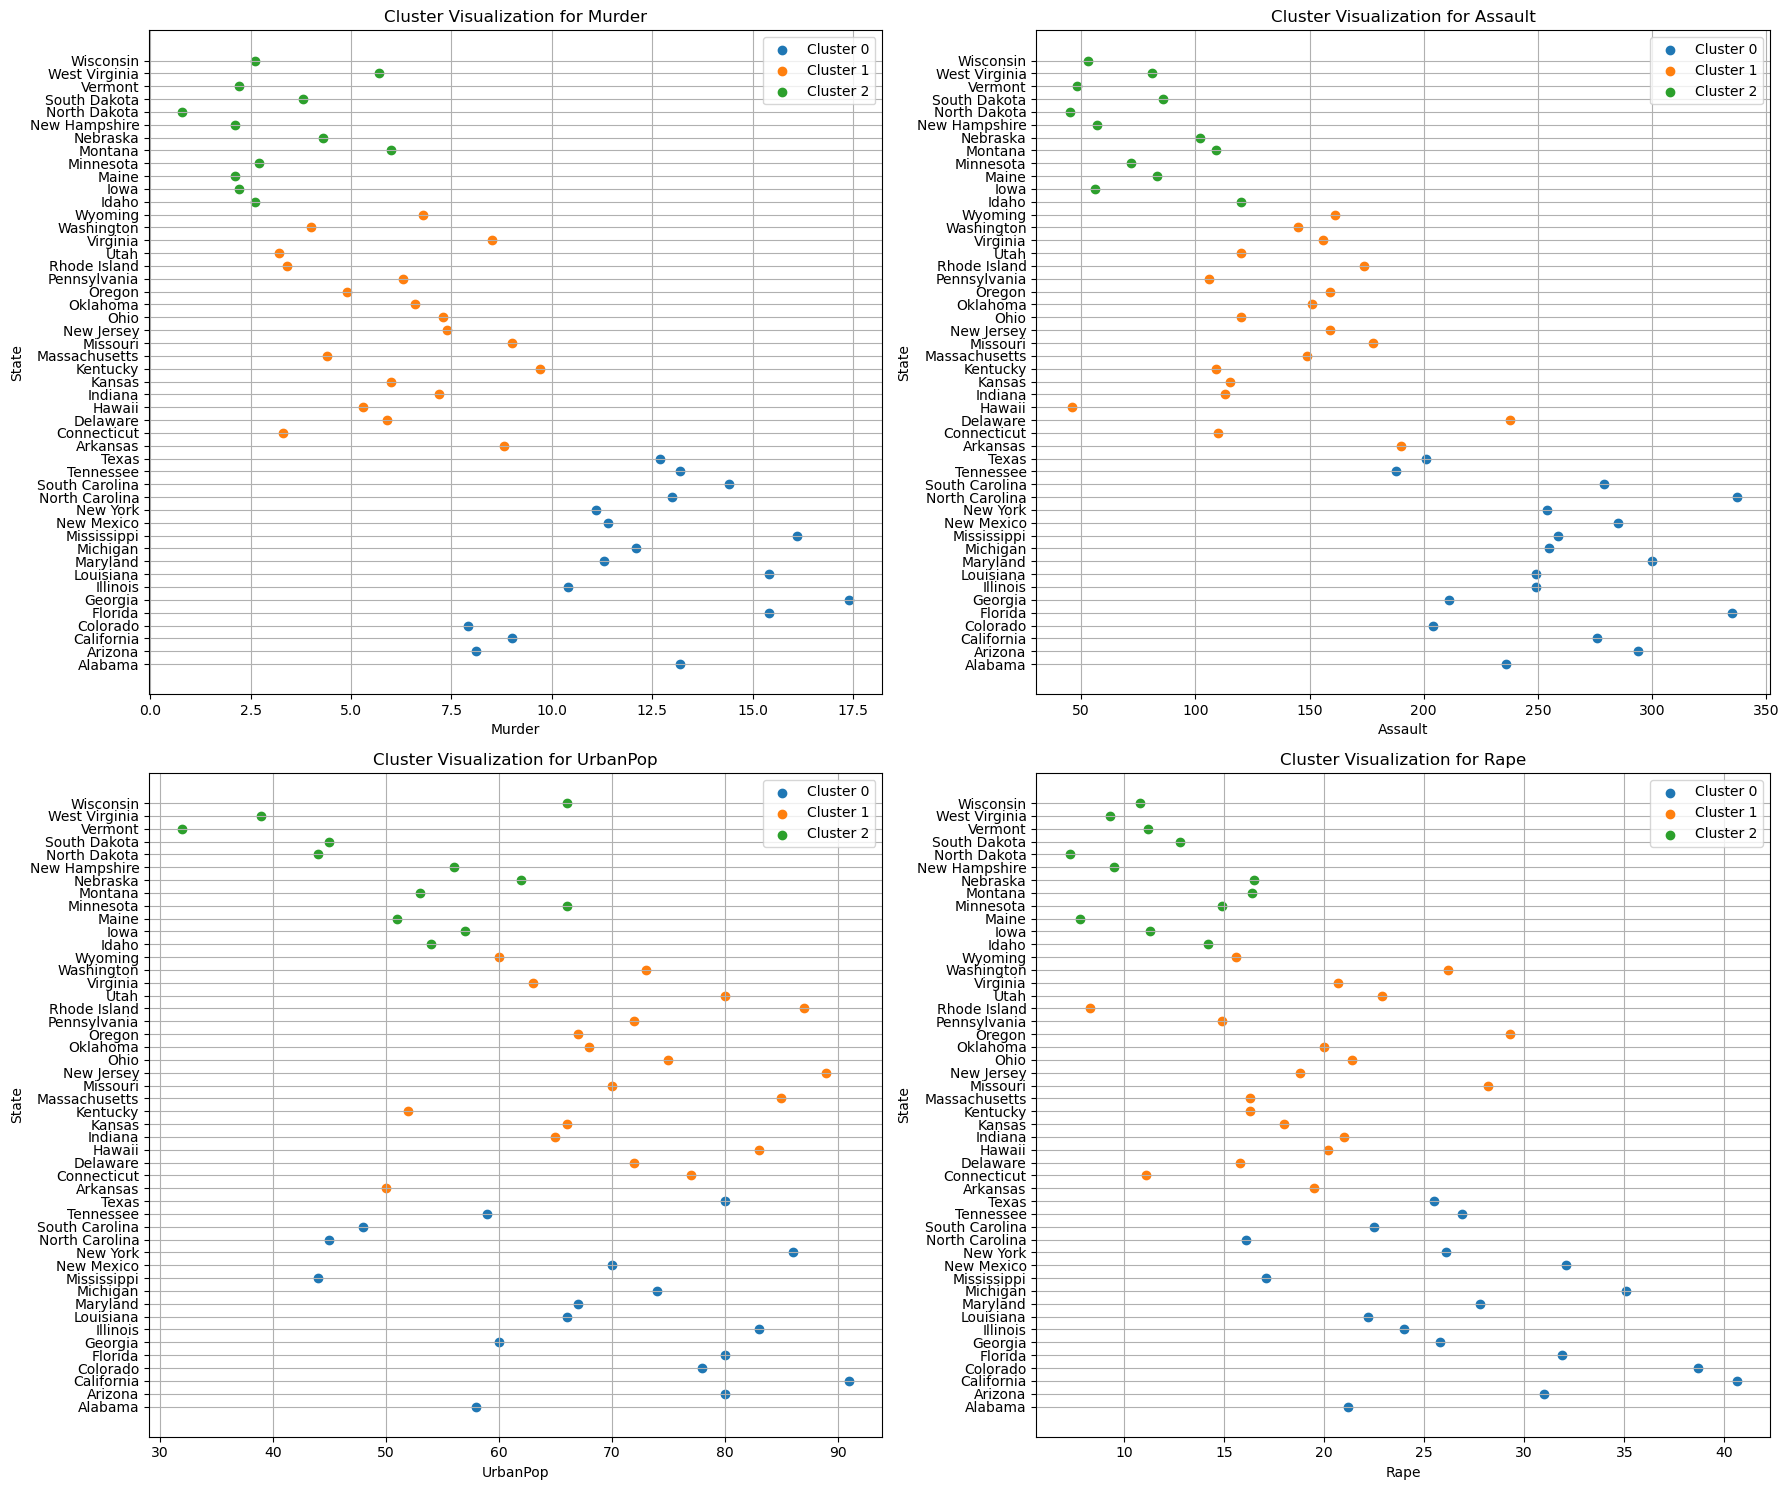

In [151]:
plt.figure(figsize=(18, 15))
crimes = ['Murder', 'Assault', 'UrbanPop', 'Rape']
for crime in crimes:
    plt.subplot(2, 2, crimes.index(crime) + 1) 
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        plt.scatter(cluster_data[crime], cluster_data[crime].index, label=f'Cluster {cluster}')
    plt.title(f'Cluster Visualization for {crime}')
    plt.xlabel(crime)
    plt.ylabel('State')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [152]:
df['Cluster']=df['Cluster'].map({0:'Dangerous', 1:'Unsafe', 2:'Safe'})
df

,Murder,Assault,UrbanPop,Rape,Cluster
State,,,,,
Alabama,13.2,236,58,21.2,Dangerous
Arizona,8.1,294,80,31.0,Dangerous
Arkansas,8.8,190,50,19.5,Unsafe
California,9.0,276,91,40.6,Dangerous
Colorado,7.9,204,78,38.7,Dangerous
Connecticut,3.3,110,77,11.1,Unsafe
Delaware,5.9,238,72,15.8,Unsafe
Florida,15.4,335,80,31.9,Dangerous
Georgia,17.4,211,60,25.8,Dangerous


### using Kmeans

In [153]:
df2 = df.copy()
df2.reset_index(inplace=True)
df2.drop(columns=['Cluster'],axis=1, inplace=True)
df2_numeric = df2.drop(columns=['State'],axis=1)
df2_numeric.head()


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,8.1,294,80,31.0
2,8.8,190,50,19.5
3,9.0,276,91,40.6
4,7.9,204,78,38.7


In [154]:
scaler = StandardScaler()
scaler.fit(df2_numeric)
df2_normal = scaler.transform(df2_numeric)
df2_normal

array([[ 1.27868078,  0.83731972, -0.53291148,  0.12062732],
       [ 0.10367682,  1.54264441,  1.01311744,  1.34090882],
       [ 0.26495187,  0.27792428, -1.09510382, -0.09105417],
       [ 0.31103046,  1.32375054,  1.7861319 ,  2.53628661],
       [ 0.05759823,  0.44817506,  0.87256935,  2.29970142],
       [-1.00220926, -0.69493736,  0.80229531, -1.13700974],
       [-0.40318763,  0.86164126,  0.4509251 , -0.55177269],
       [ 1.78554524,  2.041236  ,  1.01311744,  1.45297549],
       [ 2.24633111,  0.53330046, -0.3923634 ,  0.69341251],
       [-0.5414234 , -1.47322668,  1.22393956, -0.0038912 ],
       [-1.16348432, -0.57332966, -0.81400765, -0.75100233],
       [ 0.63358057,  0.99540974,  1.22393956,  0.46927917],
       [-0.10367682, -0.65845505, -0.04099319,  0.09572361],
       [-1.25564149, -1.35161897, -0.60318553, -1.11210604],
       [-0.38014834, -0.63413351,  0.02928085, -0.27783195],
       [ 0.47230552, -0.70709814, -0.95455574, -0.48951343],
       [ 1.78554524,  0.

c:\Users\amalp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amalp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\amalp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amalp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

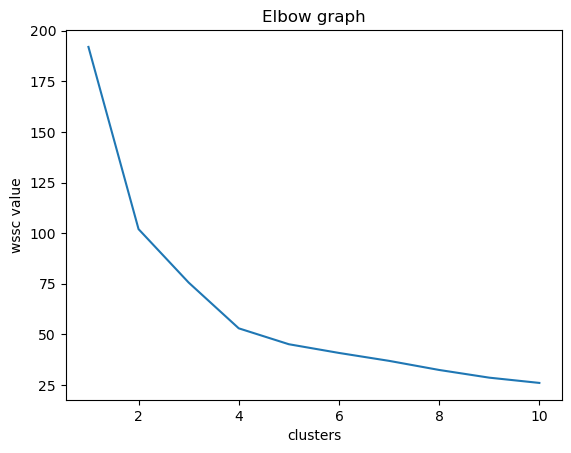

In [155]:
wssc = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(df2_normal)
    wssc.append(kmeans.inertia_)

plt.plot(range(1,11), wssc)
plt.xlabel('clusters')
plt.ylabel('wssc value')
plt.title('Elbow graph')
plt.show()


In [156]:
# num of clusters = 3
kmeans = KMeans(n_clusters=4, random_state=10)
y_pred = kmeans.fit_predict(df2_normal)

c:\Users\amalp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amalp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [157]:
y_pred

array([3, 0, 3, 0, 0, 1, 1, 0, 3, 1, 2, 0, 1, 2, 1, 2, 3, 2, 0, 1, 0, 2,
       3, 0, 2, 2, 2, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 2, 3, 0, 1, 2, 1,
       1, 2, 2, 1])

In [158]:
df2['Cluster'] = y_pred
df2

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Arizona,8.1,294,80,31.0,0
2,Arkansas,8.8,190,50,19.5,3
3,California,9.0,276,91,40.6,0
4,Colorado,7.9,204,78,38.7,0
5,Connecticut,3.3,110,77,11.1,1
6,Delaware,5.9,238,72,15.8,1
7,Florida,15.4,335,80,31.9,0
8,Georgia,17.4,211,60,25.8,3
9,Hawaii,5.3,46,83,20.2,1


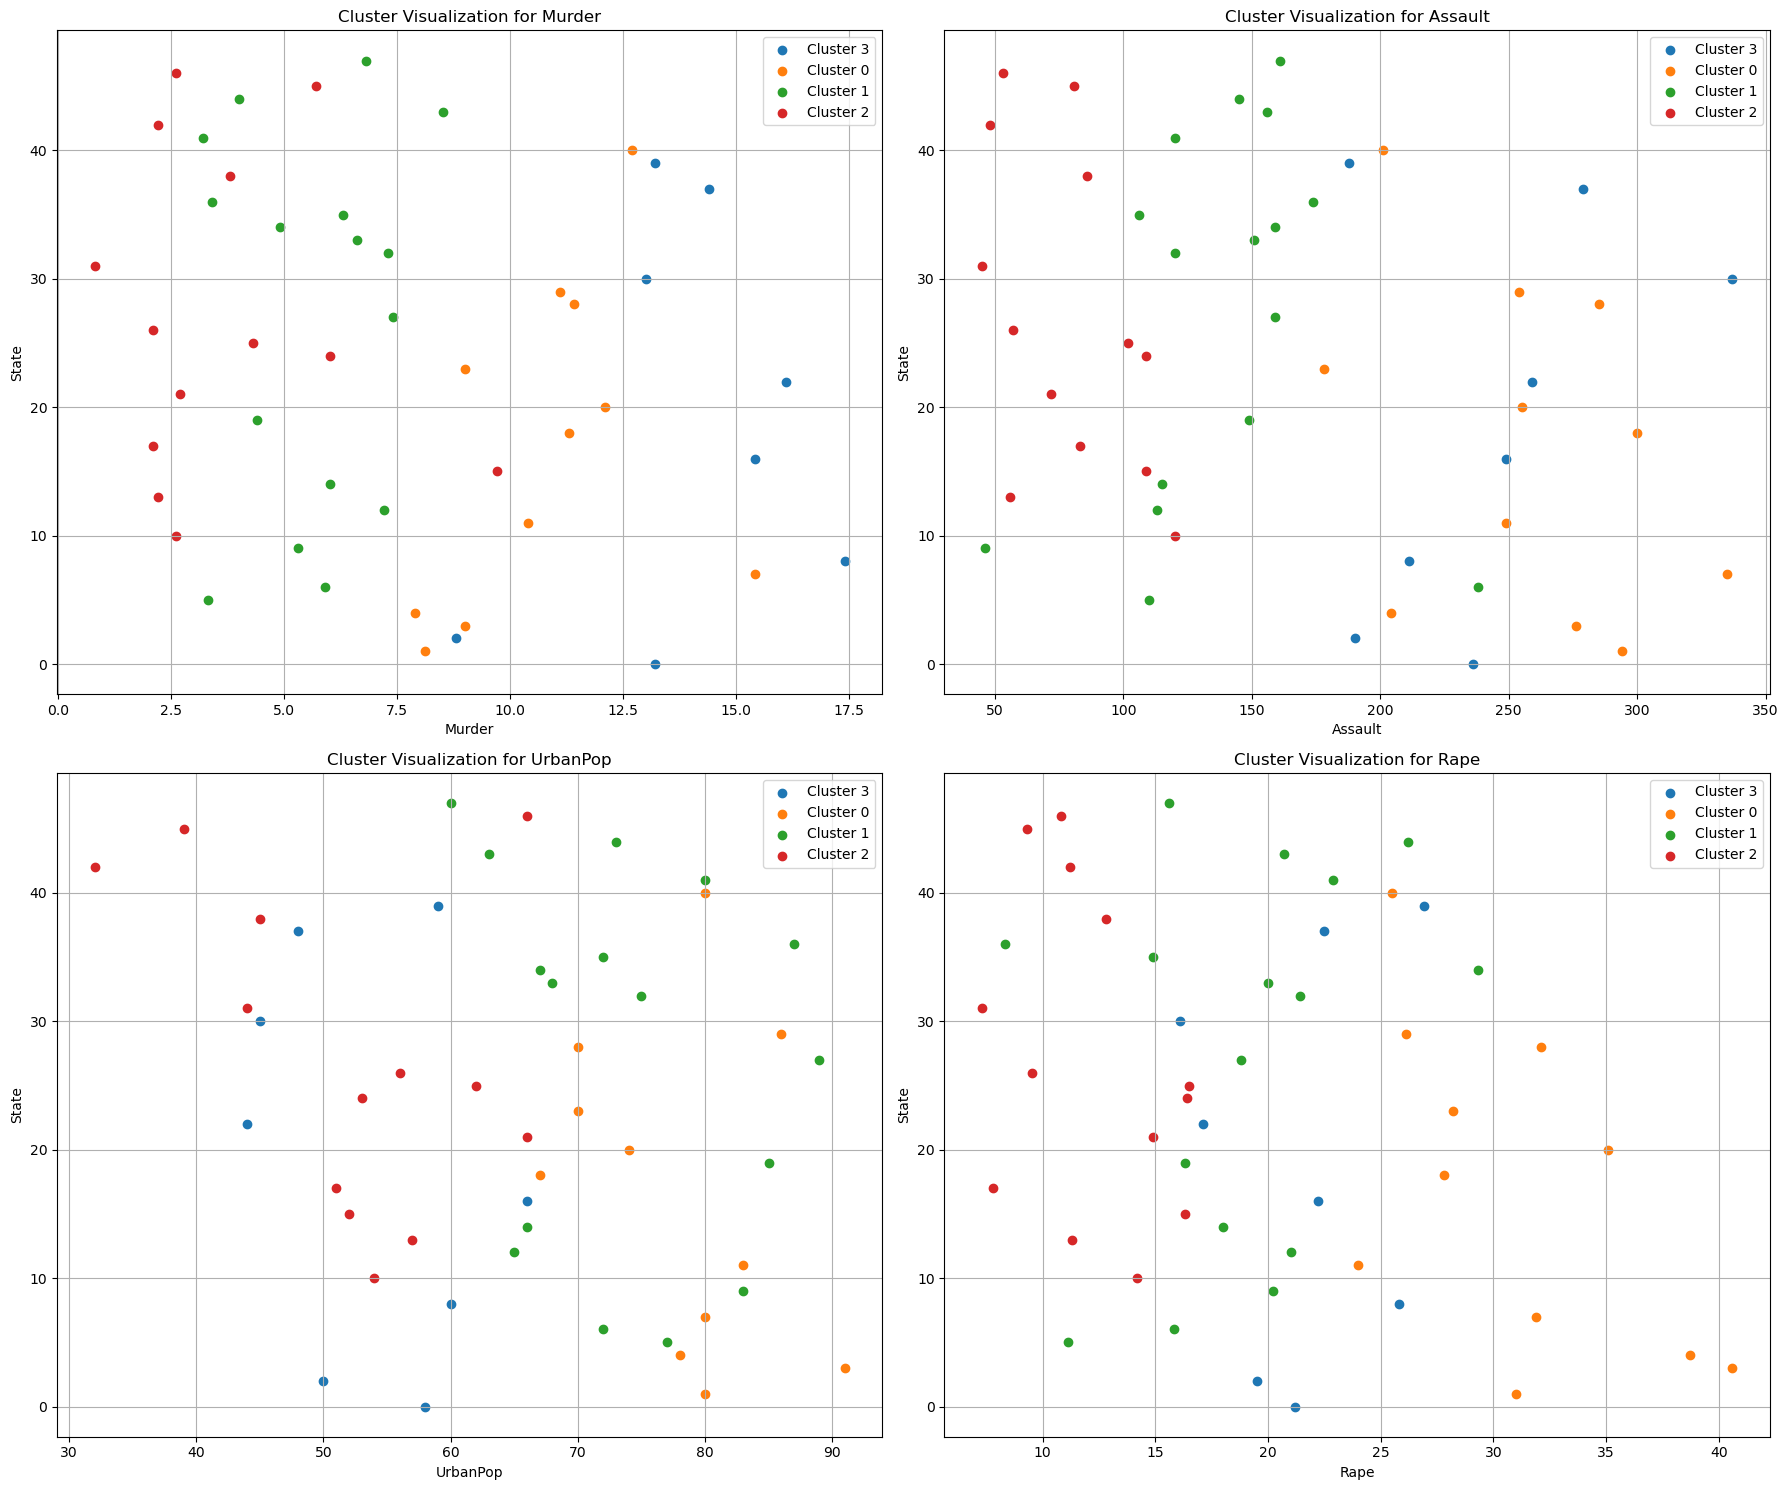

In [159]:
plt.figure(figsize=(18, 15))
crimes = ['Murder', 'Assault', 'UrbanPop', 'Rape']
for crime in crimes:
    plt.subplot(2, 2, crimes.index(crime) + 1) 
    for cluster in df2['Cluster'].unique():
        cluster_data = df2[df2['Cluster'] == cluster]
        plt.scatter(cluster_data[crime], cluster_data[crime].index, label=f'Cluster {cluster}')
    plt.title(f'Cluster Visualization for {crime}')
    plt.xlabel(crime)
    plt.ylabel('State')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

#### Similar clustering for most cases to Hierarchical but Hierarchical proved to be a better model in clustering

#### using Dbscan

In [161]:
df3 = df.copy()
df3.reset_index(inplace=True)
df3.drop(columns=['Cluster'],axis=1, inplace=True)
df3_numeric = df3.drop(columns=['State'],axis=1)
df3_numeric.head()


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,8.1,294,80,31.0
2,8.8,190,50,19.5
3,9.0,276,91,40.6
4,7.9,204,78,38.7


In [162]:
scaler = StandardScaler()
scaler.fit(df3_numeric)
df3_normal = scaler.transform(df3_numeric)
df3_normal

array([[ 1.27868078,  0.83731972, -0.53291148,  0.12062732],
       [ 0.10367682,  1.54264441,  1.01311744,  1.34090882],
       [ 0.26495187,  0.27792428, -1.09510382, -0.09105417],
       [ 0.31103046,  1.32375054,  1.7861319 ,  2.53628661],
       [ 0.05759823,  0.44817506,  0.87256935,  2.29970142],
       [-1.00220926, -0.69493736,  0.80229531, -1.13700974],
       [-0.40318763,  0.86164126,  0.4509251 , -0.55177269],
       [ 1.78554524,  2.041236  ,  1.01311744,  1.45297549],
       [ 2.24633111,  0.53330046, -0.3923634 ,  0.69341251],
       [-0.5414234 , -1.47322668,  1.22393956, -0.0038912 ],
       [-1.16348432, -0.57332966, -0.81400765, -0.75100233],
       [ 0.63358057,  0.99540974,  1.22393956,  0.46927917],
       [-0.10367682, -0.65845505, -0.04099319,  0.09572361],
       [-1.25564149, -1.35161897, -0.60318553, -1.11210604],
       [-0.38014834, -0.63413351,  0.02928085, -0.27783195],
       [ 0.47230552, -0.70709814, -0.95455574, -0.48951343],
       [ 1.78554524,  0.

In [163]:
dbscan = DBSCAN(eps=1, min_samples=5).fit_predict(df3_normal)
df3['Cluster'] = dbscan
df3

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,-1
1,Arizona,8.1,294,80,31.0,-1
2,Arkansas,8.8,190,50,19.5,-1
3,California,9.0,276,91,40.6,-1
4,Colorado,7.9,204,78,38.7,-1
5,Connecticut,3.3,110,77,11.1,0
6,Delaware,5.9,238,72,15.8,-1
7,Florida,15.4,335,80,31.9,-1
8,Georgia,17.4,211,60,25.8,-1
9,Hawaii,5.3,46,83,20.2,-1
